In [14]:
#!pip install tensorflow pandas numpy

In [15]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

In [16]:
(train_images, train_lables), (test_images, test_lables)= datasets.cifar10.load_data()

train_images, test_images= train_images/255.0, test_images/255.0

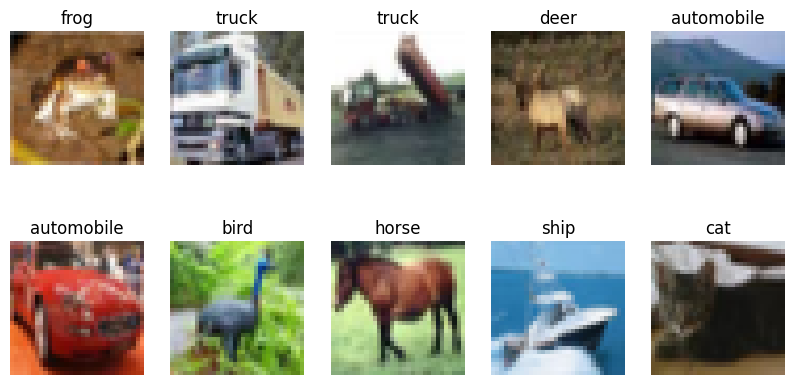

In [17]:
#optional
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i] )
    plt.title(class_names[train_lables[i][0]])
    plt.axis('off')

plt.show()

In [18]:
model= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='tanh'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
optimizer= optimizers.SGD (learning_rate=0.001, momentum=0.9)
#optimizer = optimizers.Adam(learning_rate=0.001, beta_1= 0.9, beta_2 = 0.999)


model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images, train_lables, epochs=10, batch_size=128, validation_data=(test_images, test_lables))








Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.2418 - loss: 2.1032 - val_accuracy: 0.3448 - val_loss: 1.8372
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.3672 - loss: 1.8017 - val_accuracy: 0.3993 - val_loss: 1.7281
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.3990 - loss: 1.7153 - val_accuracy: 0.4196 - val_loss: 1.6603
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.4157 - loss: 1.6647 - val_accuracy: 0.4304 - val_loss: 1.6235
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.4314 - loss: 1.6152 - val_accuracy: 0.4473 - val_loss: 1.5904
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.4488 - loss: 1.5732 - val_accuracy: 0.4490 - val_loss: 1.5598
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.4586 - loss: 1.5393 - val_accuracy: 0.4487 - val_loss: 1.5438
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.4643 - loss: 1.5166 - 

In [20]:
test_loss, test_acc= model.evaluate(test_images, test_lables)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4683 - loss: 1.4839
Test accuracy: 0.4643999934196472


In [13]:
#optional
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
train_labels= lb.fit_transform(test_lables)
test_labels = lb.transform(test_lables)
predictions = model.predict(test_images, batch_size=128)

print(classification_report(test_labels.argmax(axis=1),
                            predictions.argmax(axis=1)))


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
              precision    recall  f1-score   support

           0       0.61      0.44      0.51      1000
           1       0.62      0.57      0.59      1000
           2       0.38      0.28      0.32      1000
           3       0.40      0.14      0.20      1000
           4       0.37      0.43      0.40      1000
           5       0.35      0.45      0.39      1000
           6       0.41      0.71      0.52      1000
           7       0.50      0.51      0.50      1000
           8       0.56      0.65      0.60      1000
           9       0.57      0.53      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.46     10000
weighted avg       0.48      0.47      0.46     10000



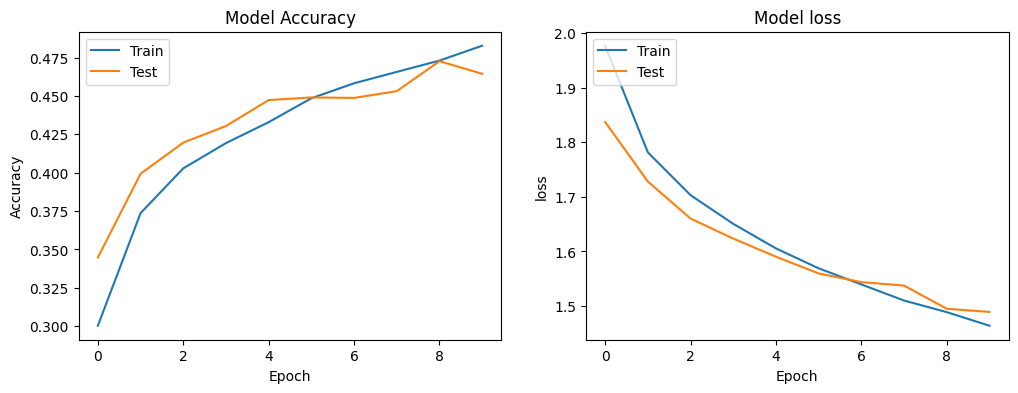

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()